In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

In [8]:
train_reg = pd.read_csv('train_reg.csv')
test_reg = pd.read_csv('test_reg.csv')

In [9]:
display(train_reg.tail(5))
display(test_reg.head(5))


,x,y
95,7.213907,19.271893
96,-0.173887,0.688316
97,3.423655,9.814922
98,9.486892,29.445184
99,5.473476,12.726861


,x
0,5.913738
1,2.657985
2,-0.666239
3,9.891288
4,7.224223


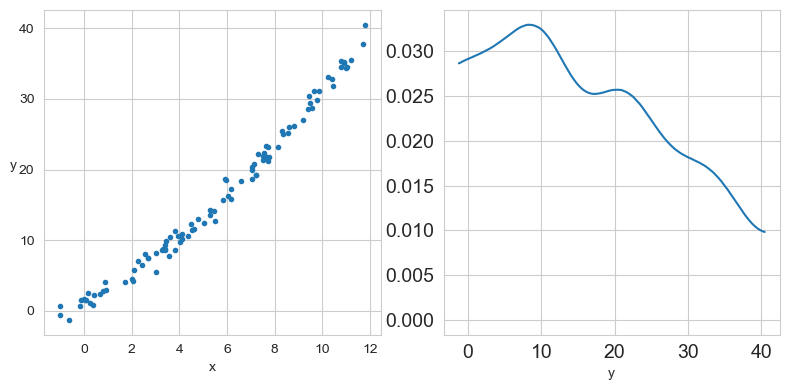

In [10]:
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(train_reg['x'], train_reg['y'], 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)

az.plot_kde(train_reg['y'], ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()


In [11]:
x = df_tr['x']
y = df_tr['y']
x = (x - x.mean())/x.std()

# y = (y - y.mean())/y.std()

NameError: name 'df_tr' is not defined

### Задание 1


In [12]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1) 
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_g = pm.sample(2000, tune=2000, chains=4, cores=4)
    

az.plot_trace(trace_g, var_names=['α', 'β', 'ε']);
az.summary(trace_g)

NameError: name 'x' is not defined

In [13]:
az.plot_pair(trace_g, var_names=['α', 'β'], scatter_kwargs={'alpha': 0.2});

NameError: name 'trace_g' is not defined

In [14]:
posterior_g = az.extract(trace_g)


alpha_m = posterior_g['α'].mean().item()
beta_m  = posterior_g['β'].mean().item()

print("всего трасс : ", posterior_g.sample.size)

draws = range(0, posterior_g.sample.size, 100)

plt.plot(x, posterior_g['α'][draws].values +
                 posterior_g['β'][draws].values * x[:,None], c='gray', alpha=0.1)

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

NameError: name 'trace_g' is not defined

### Задание 2

In [19]:
ppc = pm.sample_posterior_predictive(trace_g, model=model_g)

Sampling: [y_pred]


In [24]:
alpha = trace_g.posterior['α'].mean(("chain", "draw")).values
beta = trace_g.posterior["β"].mean(("chain", "draw")).values


y_pred = alpha+beta*(df_tes['x'])

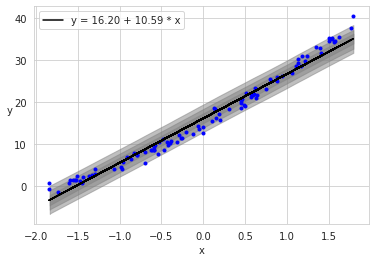

In [31]:

ax0 = az.plot_hdi(x, ppc.posterior_predictive['y_pred'], color='gray')#, smooth=False)
ax1 = az.plot_hdi(x, ppc.posterior_predictive['y_pred'], ax=ax0, hdi_prob=0.8, color='gray') # smooth=False
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], ax=ax1, hdi_prob=0.5, color='gray')  # smooth=False

plt.plot(x, y, '.', color = 'blue')
plt.plot(x, alpha + beta * x, c='k',
            label = f'y = {alpha:.2f} + {beta:.2f} * x')


plt.xlabel('x'); 
plt.ylabel('y', rotation=0);
plt.legend();

In [17]:
y_pred

0      78.806120
1      44.337092
2       9.143158
3     120.916894
4      92.680375
         ...    
95    113.530379
96    128.269455
97     35.726777
98     21.891580
99     84.022263
Name: x, Length: 100, dtype: float64